# Transformada de Fourier

Renato Naville Watanabe

## Preparação do ambiente

In [1]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00


In [15]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib widget

## Motivação



Vamos começar analisando a série de Fourier do sinal mostrado abaixo:

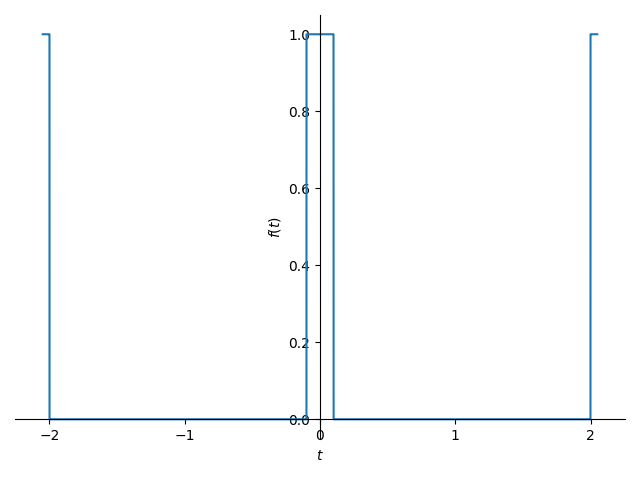

In [16]:
t = sym.symbols('t')
x = sym.Heaviside(t+0.1) - sym.Heaviside(t-0.1) + sym.Heaviside(t-2) + sym.Heaviside(t+2.1) - sym.Heaviside(t+2)
y = sym.symbols('y')
p1 = sym.plot(x, (t, -2.05, 2.05))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-2.1, -0.1, 0.1, 2.1])
ax.set_xticklabels([r'$-T$', r'-0.1', r'0.1', r'$T$'])
ax.set_yticks([1])
ax.set_yticklabels(['1'])
fig.canvas.draw_idle()

Ele é um pulso que tem 0.2 segundos de duração no valor 1 e se repete a cada T segundos.

A série de Fourier desse sinal é:

$a_n = \int_{-0.1}^{0.1}e^{-jn\frac{2\pi}{T}t}\,dt = \left.\frac{e^{-jn\frac{2\pi}{T}t}}{-jn\frac{2\pi}{T}}\right|_{t=-0.1}^{0.1} = \frac{e^{jn\frac{0,2\pi}{T}}-e^{-jn\frac{0,2\pi}{T}}}{jn\frac{2\pi}{T}} = 2\frac{\mathrm{sen}(n\frac{0,2\pi}{T})}{n\frac{2\pi}{T}}$

A frequência angular correspondente a cada $n$ é $\omega = n\frac{2\pi}{T}$. Então, podemos reescrever $a_n$ como:

$a_n = \left.2\frac{\mathrm{sen}(0,1\omega)}{\omega}\right|_{\omega=n\omega_0}$

Em que $\omega_0 = \frac{2\pi}{T}$. Perceba que se aumentarmos $T$, a frequência fundamental $\omega_0$ diminui. Podemos fazer o gráfico dos coeficientes da série de Fourier para diferentes valores de $T$.

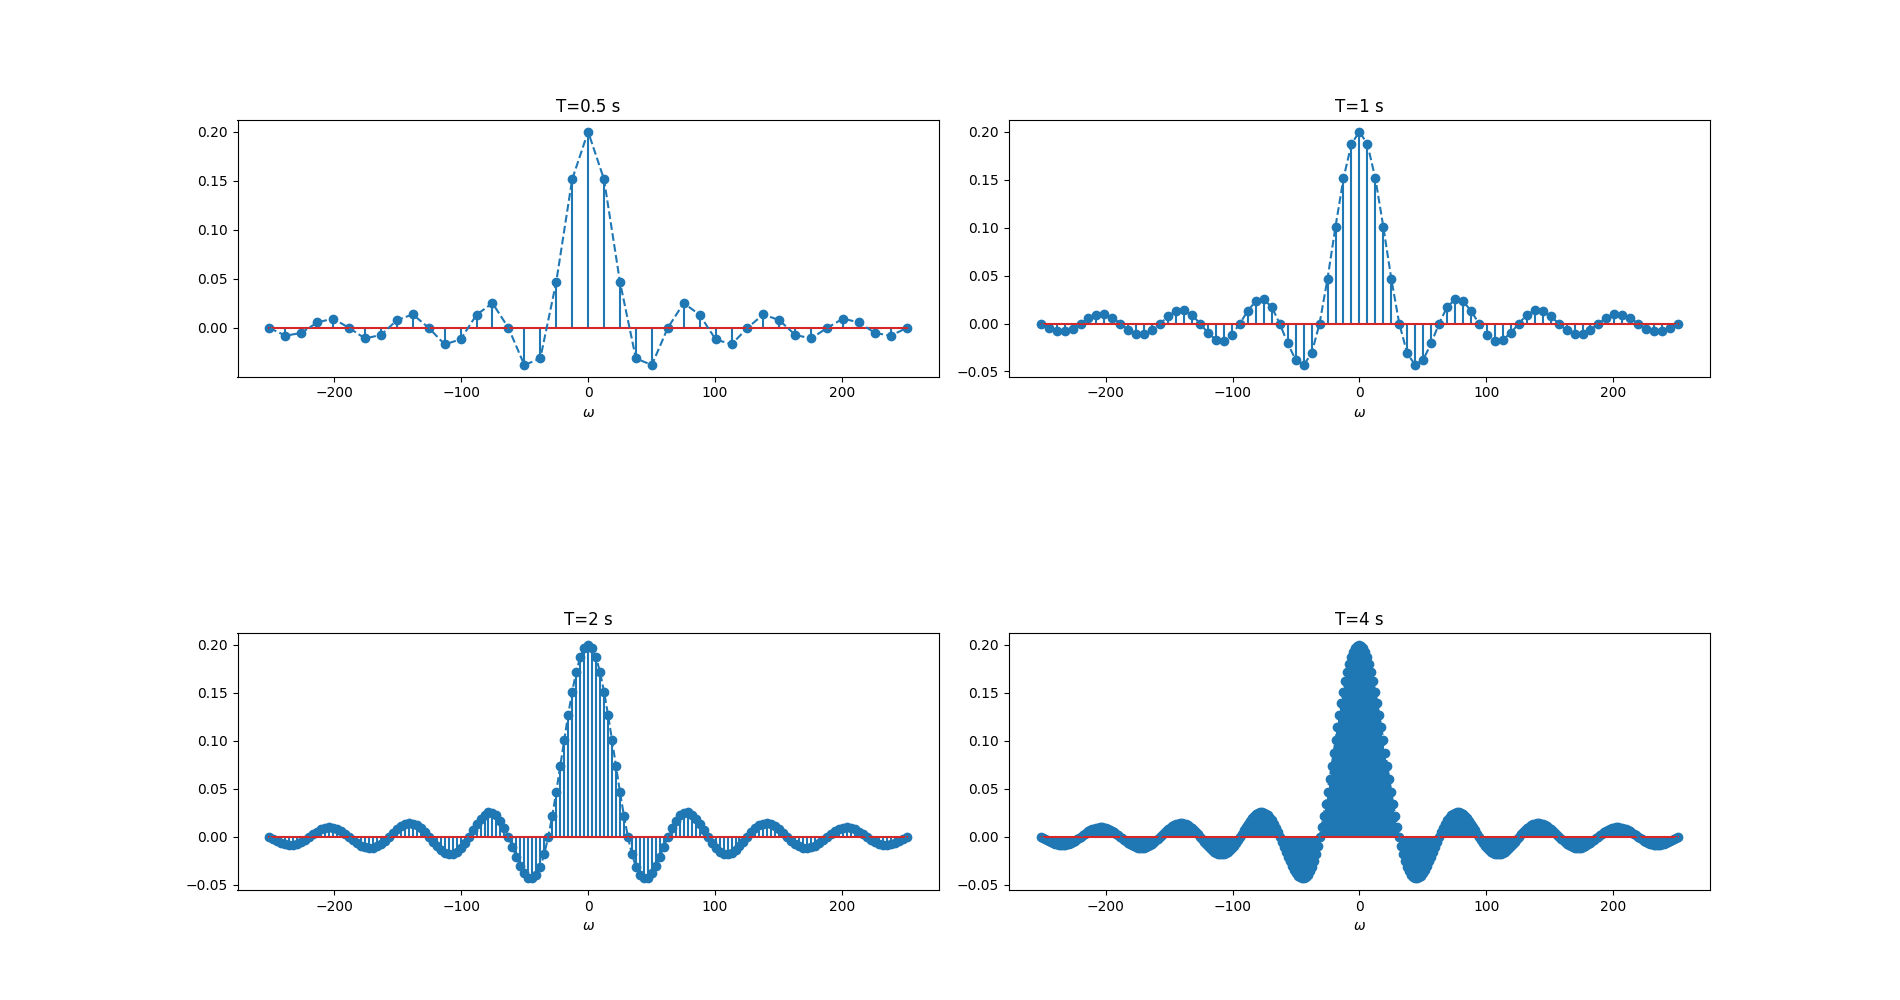

In [31]:
T = [0.5, 1, 2, 4]

p = dict()
plt.figure(figsize=(19,10))
T1=0.1
for i in range(len(T)):
    plt.subplot(2,2, i+1)
    k = np.arange(-20*2**(i), 20*2**(i)+1)
    omega = 2*np.pi/T[i]*k
    f = 0.2*np.ones(len(omega))
    f[k!=0] = 2*np.sin(omega[k!=0]*T1)/(omega[k!=0])
    plt.stem(omega, f)
    plt.plot(omega, f, '--')
    plt.xlabel(r'$\omega$')
    plt.title('T='+str(T[i])+' s')

plt.subplots_adjust(hspace=1, wspace=0.1)
plt.show()



O gráfico dos coeficientes segue a mesma envoltória, mas os coeficientes se aproximam uns dos outros conforme o valor de $T$ aumenta.

O que Joseph Fourier tentou responder é o que aconteceria se $T$ tendesse ao infinito. Nesse caso, poderíamos representar sinais não periódicos (um sinal não periódico é um sinal com período infinito). Vendo os gráficos acima, podemos intuir que se $T$ for para o infinito, a distância entre cada coeficiente será infinitesimal. Dessa intuição que surgiu a Transformada de Fourier.

## Definição


Com isso, a definição da Transformada de Fourier é:

$X(j\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt$

Diferentemente da série de Fourier, é possível calcular a Transformada de Fourier para qualquer sinal:

---

### Exemplo 1

Vamos calcular a transformada de Fourier de:

$x(t) = e^{-2t}u(t)$

$X(j\omega) = \int_{-\infty}^{\infty}e^{-2t}u(t)e^{-j\omega t}\,dt = \int_{0}^{\infty}e^{-(2+j\omega)t}\,dt = \left.\frac{e^{-(2+j\omega)t}}{-(2+j\omega)}\right|_{t=0}^\infty = \frac{0-1}{-(2+j\omega)} =  \frac{1}{2+j\omega}$



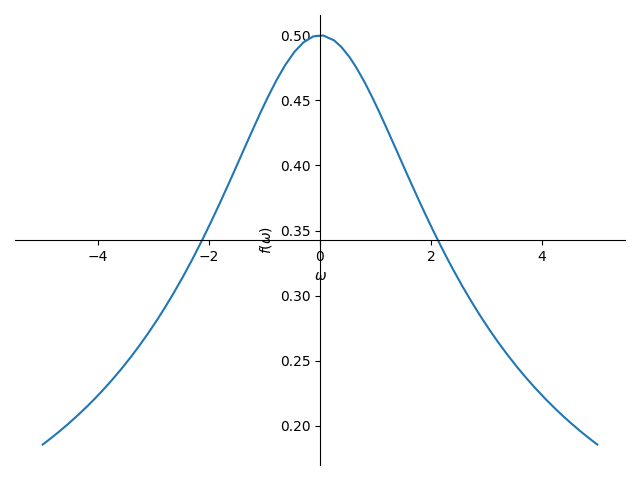

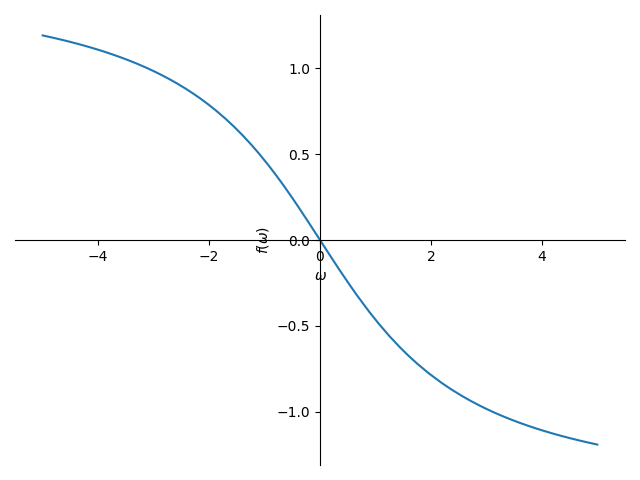

In [36]:
omega = sym.symbols('\omega')
X = 1/(2+sym.I*omega)
sym.plot(sym.Abs(X), (omega, -5, 5))
sym.plot(sym.arg(X), (omega, -5, 5))

## Exercícios

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
